# 2008-2017 Indian Premier League(Cricket) Data Analysis

In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',500)

Populating the interactive namespace from numpy and matplotlib


# 1.DataSet Description

<ul>
<li> <b> Ball_by_ball </b>is a dataset that contains information for each ball like how many runs scored, were there any extras given by bowlers, if yes, was the extra run is due to wide, NoBall, Legbye etc. and did the striker got out in the ball, if yes how like was it an LBW, Stumped etc. Each row is a ball delivered. </li>
<li> <b> Match </b> is a dataset of all matches which contains information like which teams played in thematch, where the match is played, who is the toss winner, match winner etc., . Each row is a single Match.</li>
<li> <b> Player </b> Contains information about each player like player's home country, his batting skill, bowling skill. Each row is a player  
<li> <b> Player_match </b> is a dataset of all players by each match. Each row is for a player </li>
<li> <b> Team </b> is a dataset of all teams, has info about teams names and IDs, Each row is a Team </li>
</ul>

### Important Columns in Ball_by_Ball dataset:

<ol>
<li> Runs_Scored: No of Runs Scored for each ball. </li>
<li> Bowler_Wicket: If the bowler has taken wicket in that ball </li>
<li> Bowler_Extras: If there were any extra free runs given by the bowler for taht ball </li>
<li> Striker: Player batting for the ball</li>
<li> Bowler: Player who is bowling  </li>
</ol>

### Important columns for Match dataset
<ol>
<li> City_Name : where the match is happening. </li>
<li> Team1, Team2: Teams playing in the match</li>
<li> Toss_Winner: which team won the toss in the game. </li>
<li> Match_WInner: which team won the match </li>
<li> ManOfMach: which player is man of the match </li>
<li> Toss_Name: Did the toss winner team cg=hoose to bat first or bowl first </li>
<li> Win_Type: Did the team win by runs or wickets</li>

</ol>


### Important columns for Player dataset

<ol>
<li> Player_Name: Name of the Player. </li>
<li> DOB: Date of birth of the player </li>
<li> Batting_hand: Is the player right handed or left handed batsman </li>
<li> Bowling_skill: what is the bowling skill of the plaey like is he right arm fast bowler of left hand medium bolwer </li>
<li> Country_Name: Home country of the player </li>
</ol>


### Important columns for Player_Match dataset

<ol>
<li>Player_team: Which team the player is playing for </li>
<li>Opposit_Team: who is the opposite team </li>
<li> Role_Desc: what is the role of the player in the match </li>
<li> is_manofThematch: is the player man of the match </li>
<li> Age_As_on_match: did the player's team won </li>

</ol>


In [294]:
Ball_by_ball = pd.read_csv('Ball_by_Ball.csv',encoding = "latin-1")
Match = pd.read_csv('Match.csv',encoding = "latin-1")
Player = pd.read_csv('Player.csv',encoding = "latin-1")
Player_match = pd.read_csv('Player_match.csv',encoding = "latin-1")
Team = pd.read_csv('Team.csv',encoding = "latin-1")

In [295]:
Ball_by_ball.head(1)

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Out_type,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Match_Date,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
0,598028,15,6,1,5,2,6.0,No Extras,4,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,277,104,83,NaN,NaN,20336,276,20333,103,-1,-1,20343,82,-1,4,1,0,0,20130420


In [296]:
Match.head(1)

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
0,0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,4/18/2008,2008,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Kolkata Knight Riders,field,runs,Result,BB McCullum,140.0,1


In [297]:
Player.head(1)

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India


In [298]:
Player_match.head(1)

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,Player_team,Opposit_Team,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,-1,-1.0,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Cleaning

## i. Ball_by_ball dataset cleaning

In [299]:
aBall_by_ball = Ball_by_ball.copy()

Dropping unwanted columns

In [300]:
aBall_by_ball.drop(columns = ['Extra_Type','Out_type','Match_Date','Season','Striker_match_SK','StrikerSK','NonStriker_match_SK',
                              'NONStriker_SK','Fielder_match_SK','Fielder_SK','Bowler_match_SK','BOWLER_SK','PlayerOut_match_SK',
                              'BattingTeam_SK','BowlingTeam_SK','Keeper_Catch','Player_out_sk','MatchDateSK'],inplace = True)

Replacing Team IDs with Team Names

In [301]:
aBall_by_ball.Team_Bowling.replace({'Gujarat Lions':'13','Kolkata Knight Riders':'1','Royal Challengers Bangalore':'2',
                               	'Kings XI Punjab':'4','Delhi Daredevils':'6','Rising Pune Supergiants':'12','Sunrisers Hyderabad':'11',
                               	'Mumbai Indians':'7'},inplace = True)

aBall_by_ball.Team_Batting.replace({'Gujarat Lions':'13','Kolkata Knight Riders':'1','Royal Challengers Bangalore':'2',
                               	'Kings XI Punjab':'4','Delhi Daredevils':'6','Rising Pune Supergiants':'12','Sunrisers Hyderabad':'11',
                               	'Mumbai Indians':'7'},inplace = True)

aBall_by_ball.Team_Bowling.replace({'1':'Kolkata Knight Riders','2':'Royal Challengers Bangalore','3':'Chennai Super Kings','4' :'Kings XI Punjab',
                                '5':'Rajasthan Royals','6':'Delhi Daredevils','7' :'Mumbai Indians', '8':'Deccan Chargers','9' :'Kochi Tuskers Kerala',
                               	'10':'Pune Warriors','11' :'Sunrisers Hyderabad','12' :'Rising Pune Supergiants','13' :'Gujarat Lions'},inplace = True)

aBall_by_ball.Team_Batting.replace({'1':'Kolkata Knight Riders','2':'Royal Challengers Bangalore','3':'Chennai Super Kings','4' :'Kings XI Punjab',
                                '5':'Rajasthan Royals','6':'Delhi Daredevils','7' :'Mumbai Indians', '8':'Deccan Chargers','9' :'Kochi Tuskers Kerala',
                               	'10':'Pune Warriors','11' :'Sunrisers Hyderabad','12' :'Rising Pune Supergiants','13' :'Gujarat Lions'},inplace = True)


Replacing NaNs with 0

In [302]:
aBall_by_ball.Striker_Batting_Position.replace({np.nan:'0'},inplace=True)
aBall_by_ball.Player_Out.replace({np.NaN:'0'}, inplace = True)
aBall_by_ball.Fielders.replace({np.NaN:'0'}, inplace = True)

In [303]:
aBall_by_ball.rename(columns = {'MatcH_id':'Match_Id'}, inplace = True)

## ii. Player_match cleaning

In [304]:
aplayer_match = Player_match.copy()

Removing unwanted columns

In [305]:
aplayer_match.drop(columns = ['PlayerMatch_key','Player_Captain','Opposit_captain','Player_keeper','Opposit_keeper',
                              'Bowling_Status','Batting_Status'],inplace = True)

Replacing right handed batsman with 1 and left handed batsman with 0s

In [306]:
aplayer_match.Batting_hand.replace({'Right-hand bat':1,'Left-hand bat':0,'\xa0Right-hand bat':1,'\xa0Left-hand bat':0,
                                    'Right-handed':1}, inplace = True)

cleaning the data

In [307]:
aplayer_match.Bowling_skill.replace({'Right-arm medium-fast':'Right-arm fast-medium','Left-arm medium-fast':'Left-arm fast-medium',
                                       '\xa0Left-arm fast':'Right-arm fast','\xa0Right-arm fast-medium':'Right-arm fast-medium',
                                       '\xa0Right-arm medium-fast':'Right-arm fast-medium','\xa0Right-arm offbreak':'Right-arm offbreak',
                                       '\xa0Legbreak':'Legbreak'}, inplace = True)

Removing first row in the dataset which contains null values

In [308]:
aplayer_match.columns = aplayer_match.iloc[0]
aplayer_match = aplayer_match.reindex(aplayer_match.index.drop(0)).reset_index(drop=True)
aplayer_match.columns.name = None

In [309]:
columns = Player_match.columns
columns = columns.drop(['PlayerMatch_key','Batting_Status','Bowling_Status', 'Player_Captain', 'Opposit_captain',
       'Player_keeper', 'Opposit_keeper'])

In [310]:
aplayer_match.columns = columns

In [311]:
aplayer_match.rename(columns = {'match_id':'Match_Id'}, inplace = True)

## iii. Match Cleaning

In [312]:
aMatch = Match.copy()

#Replacing fielding with 0s and batting with 1s for Toss_Name column
aMatch.Toss_Name.replace({'field':0, 'Field':0,'bat':1, 'Bat':1},inplace=True)

aMatch.Win_Type.replace({'run':1, 'runs':1,'wickets':0, 'Tie':3,'NO Result':3},inplace=True)

#Defining Win as 1 if Win_type is 1 or 0 so that we can eliminate matches which are tied, cancelled etc which has win_type = 3
aMatch['Win']= ((aMatch.Win_Type == 1) | (aMatch.Win_Type == 0))*1

aMatch.drop(['Outcome_Type','ManOfMach','Venue_Name'],axis=1,inplace=True)

# function to find the team's home city based on its name
def home(x):
    if x.startswith('Kol'):
        return ('Kolkata')
    elif x.startswith('Roy'):
        return ('Bangalore')
    elif x.startswith('Che'):
        return ('Chennai')
    elif x.startswith('Kin'):
        return ('Mohali')
    elif x.startswith('Raj'):
        return ('Jaipur')
    elif x.startswith('Del'):
        return ('Delhi')
    elif x.startswith('Mum'):
        return ('Mumbai')
    elif x.startswith('Dec'):
        return ('Hyderabad (Deccan)')
    elif x.startswith('Koc'):
        return ('Kochi')
    elif x.startswith('Pune'):
        return ('Pune')
    elif x.startswith('Sun'):
        return ('Hyderabad')
    elif x.startswith('Ris'):
        return ('Pune')
    elif x.startswith('tie'):
        return ('tie')
    elif x.startswith('nan'):
        return ('na')
    elif x.startswith ('aba'):
        return ('na')
    else:
        return ('Ahmedabad')

In [313]:
# remove tied and no result records
aMatch = aMatch[aMatch.Win_Type != 3]

# Insight 1:

## Summary of the finding:

## Home team has 60% higher chances of winning the game

### Data Preparation

In [314]:
aMatch1 = aMatch.copy()
# removing nan records
aMatch1 = aMatch[(aMatch.Toss_Name ==0) | (aMatch.Toss_Name==1)]
aMatch1 = aMatch[(aMatch.Win_Type==1)|(aMatch.Win_Type==0)]

creating columns for each team cities

In [315]:
aMatch1['team1_city'] = aMatch1.Team1.apply(home)
aMatch1['team2_city'] = aMatch1.Team2.apply(home)

creating new columns 
1) ishome_play which is 1 if the match is played at one of the team's home  ground
2) home_win which is 1 if hometeam wins the match
3) toss&win is 1 if the same team has won both the toss and the match

In [316]:
aMatch1['ishome_play'] = ((aMatch1.team1_city==aMatch1.City_Name)|(aMatch1.team2_city==aMatch1.City_Name))*1
aMatch1['home_win']= ((aMatch1.match_winner.apply(home))==aMatch1.City_Name)*1
aMatch1['toss&win']=(aMatch1.match_winner==aMatch1.Toss_Winner)*1

Dropping unwanted columns

In [317]:
aMatch1.drop(columns=['Season_Year','Country_Name','Match_SK','match_id', 'Team1', 'Team2', 'City_Name','match_date','Win_Type', 'Win_Margin', 'Toss_Winner',
       'match_winner', 'team1_city', 'team2_city', ],axis=1,inplace=True)

### Machine Learning: Clustering

In [318]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=2)
cl.fit(aMatch1)
cl.labels_
df4 = aMatch1.copy()
df4['cluster'] = cl.labels_
df4.groupby('cluster').mean()

,Toss_Name,Country_id,Win,ishome_play,home_win,toss&win
cluster,,,,,,
0,0.431267,1.000000,1.0,1.0,0.58221,0.520216
1,0.427451,1.368627,1.0,0.0,0.00000,0.501961


### Validity of the Finding

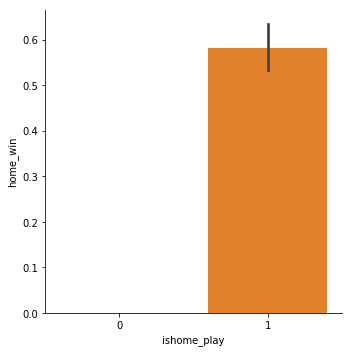

In [319]:
sns.catplot(x='ishome_play',y='home_win',data=df4,kind='bar',
           aspect=1)

'is home_play' column on x axis says if the match is played on the home ground and the 'home_win' on y axis shows whether the match played at home ground was won by the home team or not?

If 'ishome_play is 1(meaning that it is played on homeground),then home team wins approximately 60% of the time.

## Managerial/ Stakeholder's insights

## The team playing against an opponent team that is playing on its home ground, should prepare harder and try to set higher targets as the chances of winning for the opponent home team are higher upto 60%.

# Insight 2:

### Summary of the Finding:

### When we compared Local players performance vs International player's performance and Captain vs Non-Captain based on number of Runs Scored, we found that Local Captains are performing better compared to international Captains and  it is opposite in Non-Captains category, where international Non-Captain players are scoring more compared to local Non-Captain players


IPL contains players from different countries. Hence, by local we mean Indian players and International meaning players from other countries.

### Data Preparation

#### Creating new tables 
df1: Has Runs Scored information for each batsman 

df2: Has information about no of wickets taken and extra runs given by each Bowler

df3: Has player's info like player's role description in each match, is th eplayer man of the match, player's age as on match etc.,

In [320]:
df1 = aBall_by_ball.groupby(['Match_Id','Striker']).agg({'Runs_Scored':'sum'}).reset_index()
df2 = aBall_by_ball.groupby(['Match_Id','Bowler']).agg({'Bowler_Wicket':'sum','Bowler_Extras':'sum'}).reset_index()
df3 = aplayer_match[['Match_Id','Player_Id','Player_Name','Country_Name','Role_Desc','is_manofThematch','Age_As_on_match',
                     'IsPlayers_Team_won']]

Merging the above files to form a single file by matching on 'match id' and 'player's id'

In [321]:
p1 = df3.merge(df1, how = 'right', left_on = ['Match_Id','Player_Id'], right_on = ['Match_Id','Striker'])
p2 = df3.merge(df2, how = 'right', left_on = ['Match_Id','Player_Id'], right_on = ['Match_Id','Bowler'])

In [322]:
p1['Bowler_Wicket'] = 0
p1['Bowler_Extras'] = 0
p2['Runs_Scored'] = 0

In [323]:
p3 = pd.concat([p1,p2], ignore_index = True)

Creating a new column is_captain which is 1 if player's description contain 'captain' else 0

In [324]:
p3['is_Captain'] = ((p3['Role_Desc']=='Captain') | (p3['Role_Desc']=='CaptainKeeper'))*1

Creating a new table by grouping by each country, each player, each match and by captain

In [325]:
p4 = p3.groupby(['Country_Name','Player_Name','Match_Id','is_Captain']).agg({'is_manofThematch':'mean','Runs_Scored':'sum','Bowler_Wicket':'sum',
                                                                  'Bowler_Extras':'sum'}).reset_index()

creating a new column is_local which is 1 if player's country is india else 0

In [326]:
p4['is_local'] = (p4['Country_Name'] == 'India')*1

In [327]:
p5 = p4.drop(columns = ['Country_Name','Player_Name','Match_Id'])

### Machine Learning: Regression Tree

In [328]:
X = p4.drop(columns = ['Country_Name','Player_Name','Match_Id','Runs_Scored','is_manofThematch'])
Y = p4.Runs_Scored

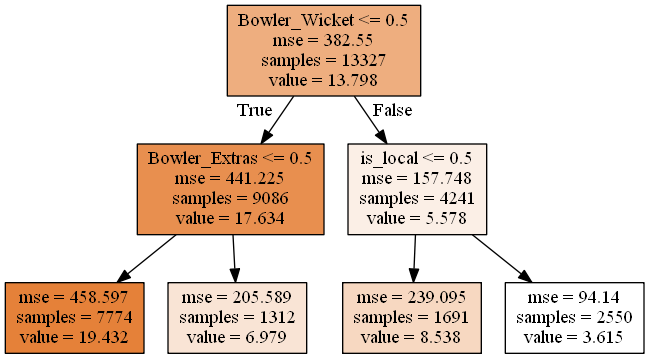

In [329]:
class_tree = tree.DecisionTreeRegressor(max_depth = 2)

class_tree.fit(X,Y)

class_tree_feature_names = list(X.columns)
class_tree_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(class_tree, out_file='tree.dot', 
    feature_names=class_tree_feature_names, class_names=class_tree_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In the above regression tree we tried to predict the No of Runs scored by keeping all the variables, but no meaningful output came. So we removed columns like Bowler_Wicket and Bowler_Extras and re run the regression.

In [254]:
X = p4.drop(columns = ['Country_Name','Player_Name','Match_Id','Runs_Scored','is_manofThematch','Bowler_Wicket','Bowler_Extras'])
Y = p4.Runs_Scored

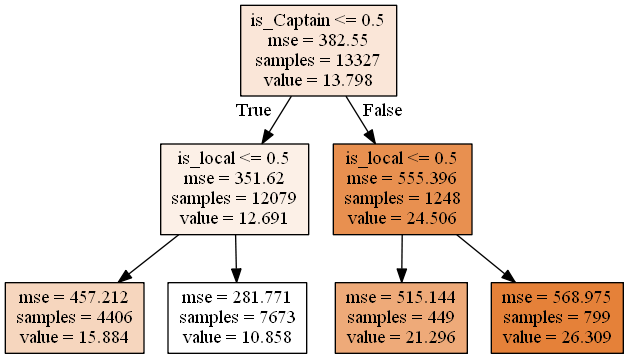

In [255]:
class_tree = tree.DecisionTreeRegressor(max_depth = 2)

class_tree.fit(X,Y)

class_tree_feature_names = list(X.columns)
class_tree_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(class_tree, out_file='tree.dot', 
    feature_names=class_tree_feature_names, class_names=class_tree_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Validity of the Finding:

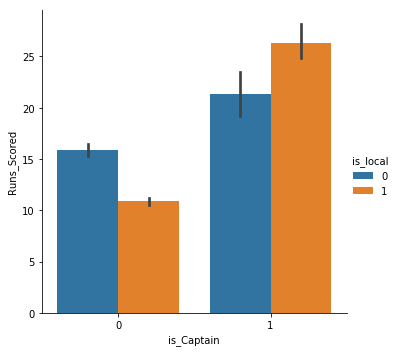

In [256]:
sns.catplot(x = 'is_Captain', y = 'Runs_Scored', hue = 'is_local',data = p4, kind = 'bar')

## Managerial Insights

## To have a strong batting line up, during the team formation, Franchise Owners should bid for more international players but  the captain made should be an Indian.

# Insight 3:

### Summary of the Finding:

## Overall, Captain are better Batsman than they are Bowlers


### Machine Learning: Clustering

In [257]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=3)
cl.fit(p5)
p5['cluster'] = cl.labels_
p5.groupby('cluster').mean()

,is_Captain,is_manofThematch,Runs_Scored,Bowler_Wicket,Bowler_Extras,is_local
cluster,,,,,,
0,0.062378,0.018724,3.229915,0.637818,0.605160,0.659808
1,0.206804,0.331244,64.122650,0.148612,0.129812,0.525515
2,0.146825,0.029431,27.310185,0.214286,0.195437,0.603175


### Validity of the Finding:

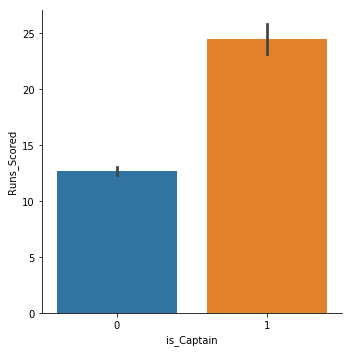

In [258]:
sns.catplot(x = 'is_Captain', y = 'Runs_Scored', data = p5, kind = 'bar')

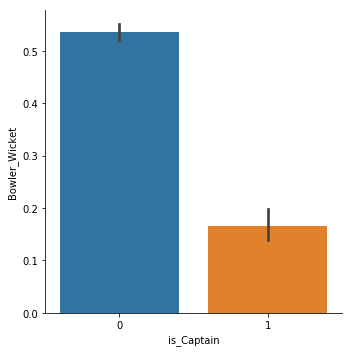

In [259]:
sns.catplot(x = 'is_Captain', y = 'Bowler_Wicket', data = p5, kind = 'bar')

## Managerial Insights

## For decisions related to batting, a captain will be a good decision maker but for bowling related decision making the captain might need more training as it seems they are mostly good at batting and are opposite when it comes to bowling.

# Insight 4:
### Summary of the Finding:

## Players with better batting skills has higher chances of becoming Man of the Match compared to the Players with better bowling skills

### Data Preparation

In [277]:
#making a copy of match dataset
aMatch2 = Match.copy()
aBall_by_ball1 = Ball_by_ball.copy()
aPlayer = Player.copy()
#giving numeric values to toss and win type
aMatch2.Toss_Name.replace({'field':0, 'Field':0,'bat':1, 'Bat':1},inplace=True)
aMatch2.Win_Type.replace({'run':1, 'runs':1,'wickets':0, 'Tie':3,'NO Result':3},inplace=True)

In [278]:
aPlayer.replace({'Right-hand bat':1,'Left-hand bat':0,'\xa0Right-hand bat':1,'\xa0Left-hand bat':0,'Right-handed':1}, inplace = True)
aPlayer['ball_hand']=aPlayer.Bowling_skill
aPlayer['ball_type']=aPlayer.Bowling_skill
aPlayer.ball_hand.replace({'Slow left-arm orthodox':0, 'Left-arm medium':0, 'Right-arm medium':1,
       'Right-arm medium-fast':1, 'Right-arm fast-medium':1,
       'Right-arm offbreak':1, 'Legbreak googly':1, 'Legbreak':1,
       'Right-arm fast':1, 'Left-arm fast-medium':0, 'Left-arm medium-fast':0,
       'Slow left-arm chinaman':0, 'Left-arm fast':0,
       '\xa0Right-arm fast-medium':1, '\xa0Left-arm fast':0,
       '\xa0Right-arm offbreak':1, '\xa0Right-arm medium-fast':1,
       '\xa0Legbreak':1, 'Right-arm medium fast':1},inplace = True)

aPlayer.ball_type.replace({'Slow left-arm orthodox':0, 'Left-arm medium':1, 'Right-arm medium':1,
       'Right-arm medium-fast':1, 'Right-arm fast-medium':1,
       'Right-arm offbreak':0, 'Legbreak googly':0, 'Legbreak':0,
       'Right-arm fast':1, 'Left-arm fast-medium':1, 'Left-arm medium-fast':1,
       'Slow left-arm chinaman':0, 'Left-arm fast':1,
       '\xa0Right-arm fast-medium':1, '\xa0Left-arm fast':1,
       '\xa0Right-arm offbreak':0, '\xa0Right-arm medium-fast':1,
       '\xa0Legbreak':0, 'Right-arm medium fast':1},inplace = True)

aPlayer.drop(columns='Bowling_skill',inplace=True)

In [279]:
man = aMatch2.merge(aPlayer,how='left',left_on='ManOfMach',right_on='Player_Name')
tbat=aBall_by_ball1.groupby(['MatcH_id','Striker']).agg({'Runs_Scored':'sum'}).reset_index()
tball=aBall_by_ball1.groupby(['MatcH_id','Bowler']).agg({'Bowler_Wicket':'sum'}).reset_index()

In [280]:
stat1 = tbat.merge(man,how='left',left_on=['MatcH_id','Striker'],right_on=['match_id','Player_Id'])
stat2 = tball.merge(man,how='left',left_on=['MatcH_id','Bowler'],right_on=['match_id','Player_Id'])

In [281]:
stat1['man_of_match']=(stat1.Striker==stat1.Player_Id)*1
# In general, If the Runs scored are greaer than 70 then the player is considered as batsman
stat1['isbatsman']= (stat1.Runs_Scored>70)*1

In [282]:
stat2['man_of_match']=(stat2.Bowler==stat2.Player_Id)*1
#In general, if the no of wickets taken are greater than 2 then the player is considered as bowler
stat2['isbowler']= (stat2.Bowler_Wicket>2)*1

In [283]:
stat1.drop(['Match_SK', 'match_id', 'Team1',
       'Team2', 'match_date', 'Season_Year', 'Venue_Name', 'City_Name',
       'Country_Name_x', 'Toss_Winner', 'match_winner', 'Toss_Name',
       'Win_Type', 'Outcome_Type', 'ManOfMach', 'Win_Margin', 'Country_id',
       'PLAYER_SK', 'Player_Id','ball_hand', 'ball_type', 'Player_Name', 'DOB', 'Batting_hand',
       'Country_Name_y'],axis=1,inplace=True)

In [284]:
stat2.drop([ 'Match_SK', 'match_id', 'Team1',
       'Team2', 'match_date', 'Season_Year', 'Venue_Name', 'City_Name',
       'Country_Name_x', 'Toss_Winner', 'match_winner', 'Toss_Name',
       'Win_Type', 'Outcome_Type', 'ManOfMach', 'Win_Margin', 'Country_id',
       'PLAYER_SK', 'Player_Id', 'Player_Name', 'DOB', 'Batting_hand',
       'Country_Name_y', 'ball_hand', 'ball_type'],axis=1,inplace=True)

In [285]:
stat1['Bowler_Wicket']=0
stat2['isbatsman']=0
stat2['Runs_Scored']=0
stat1['isbowler']=0
stat1.rename(columns={'Striker':'Player'}, inplace=True)
stat2.rename(columns={'Bowler':'Player'}, inplace=True)

In [286]:
stat1 = stat1.append(stat2)

In [287]:
tf=stat1.groupby(['MatcH_id','Player']).agg({'Runs_Scored':'sum','Bowler_Wicket':'sum','isbatsman':'sum','isbowler':'sum','man_of_match':'mean'}).reset_index()


In [288]:
tf.drop(['Player','MatcH_id'],axis=1,inplace=True)

In [289]:
df= tf.copy()
#df['skill']=(((df.isbatsman==1)*1)|((df.isbowler==1)*2))
#df[(df.man_of_match==1)&(df.Runs_Scored<40)&((df.Bowler_Wicket==0)|(df.Bowler_Wicket==1))]

### Machine Learning: Clustering

In [290]:
from sklearn.cluster import KMeans
cl = KMeans(n_clusters=2)
cl.fit(tf)
cl.labels_
df4 = tf.copy()
df4['cluster'] = cl.labels_
df4.groupby('cluster').mean()

,Runs_Scored,Bowler_Wicket,isbatsman,isbowler,man_of_match
cluster,,,,,
0,47.593579,0.166014,0.119029,0.014096,0.171104
1,5.785482,0.580061,0.000000,0.045298,0.018008


### Validity of the Finding:

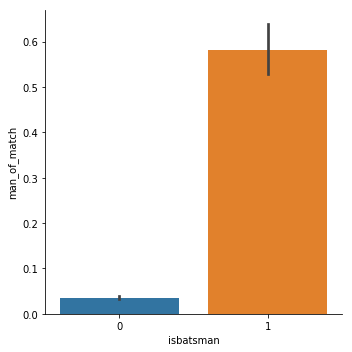

In [291]:
sns.catplot(x = 'isbatsman', y = 'man_of_match', data = tf, kind = 'bar')

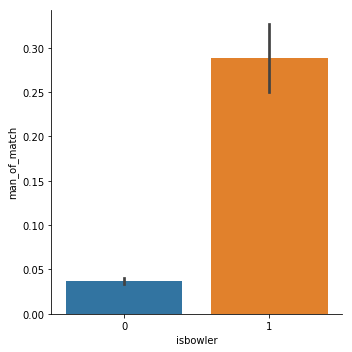

In [292]:
sns.catplot(x = 'isbowler', y = 'man_of_match', data = tf, kind = 'bar')

In the first graph we can see that batsman has 60% of winning the man of the match, and in the second graph bowler only has approximately 30% of winning.

## Managerial/Stakeholder's Insights:

## The people making bets on man of the match should actually bet on the player who batted the best, as the probablity of batsmen becoming man of the match is higher than that of ballers.